In [68]:
import numpy as np
import pandas as pd
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import math
from matplotlib import style
from scipy.misc import derivative
import inspect

from IPython.display import display, clear_output

style.use('ggplot')
style.use('seaborn-ticks')

In [69]:
def f(x):
    return x**4 + 4*(x**3) + 7*(x**2) + 2*x + 1

def D(f, x):
    return derivative(f, x, dx=1e-6)

def D2(f, x):
    return derivative(f, x, n = 2, dx=1e-6)

In [70]:
class Secant_search:
    def __init__(self, f, a, b, e, prec = 4):
        raw_f = inspect.getsource(f)
        self.func = raw_f[raw_f.find('return') + 6:].strip()
        self.a, self.b, self.e = a, b, e
        self.prec = prec
        
    def f(self, x):
        return f(x)
    
    def D(self, f, x):
        return D(x)
    
    def fit(self):
        a, b, e = self.a, self.b, self.e
        prec = self.prec
        
        cache = {}
        i = 0
        if D(f, a) >=0 or D(f, b)<=0:
            return 'Невозможно применить метод'
        while 1:
            z = b - ((D(f, b)*(b-a)) / (D(f, b) - D(f, a)))
            cache[i] = [a, f(a), b, f(b), z, D(f, z), f(z)]
            if abs(D(f, z)) <= e:
                data = pd.DataFrame(cache).T
                data.columns = ['a', 'f(a)', 'b','f(b)', 'z', "D(f(z))" ,'f(z)']
                self.data = data
                self.res = [round(z, prec), round(f(z), prec)]
                break
            else:
                if D(f, z) < 0:
                    a = z
                else:
                    b = z
            i+=1
  
    def rep(self):
        return print(f'Минимум функции f(x) = {self.func}, равный {round(self.res[1], self.prec)}  достигается при x = {round(self.res[0], self.prec)} с точностью e = {self.e} на шаге {len(self.data)}') 
    
    def vis_steps(self, update = 0.5):
        df, opt = self.data, self.res
        f, a, b = self.f, self.a, self.b
        prec = self.prec
        
        plt_x = np.linspace(a, b, round((b-a)*250))
        plt_data = np.array([plt_x, [f(x) for x in plt_x]])
        plt_data_der = np.array([plt_x, [D(f, x) for x in plt_x]])
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 9))   
        
        for i in range(5):
            display(fig)
            ax1.cla()
            clear_output(wait = True)
            plt.pause(0.5)
        
        for i in range(len(df)):

            ax1.axhline(y=0, color='k', linewidth=1)
            ax1.axvline(x=0, color='k', linewidth=1)
        
            ax2.axhline(y=0, color='k', linewidth=1)
            ax2.axvline(x=0, color='k', linewidth=1)
            
            ax1.plot(plt_data_der[0], plt_data_der[1], c = 'blue', label = "D(f(x))")
            ax2.plot(plt_data[0], plt_data[1], c = 'blue', label = 'f(x)')
            
            ax1.scatter(0, 0, c = 'white', label = f'step {i+1}')

            
            if i != len(df) - 1:
                ax1.plot([df['a'][i], df['b'][i]], [D(f, df['a'][i]), D(f, df['b'][i])], 'ro-', label = f'D(f(z)) = {round(df["D(f(z))"][i], prec)}')
                ax2.scatter(df['z'][i], df['f(z)'][i], label = f'f(z) = {round(df["f(z)"][i], prec)}')
                
                ax1.scatter(0, 0, c = 'white', label = f'z = {round(df["z"][i], prec)}')
                ax2.scatter(0, 0, c = 'white', label = f'z = {round(df["z"][i], prec)}')
            else:
                ax1.plot([df['a'][i], df['b'][i]], [D(f, df['a'][i]), D(f, df['b'][i])], 'ro-', label = f'D(f(x*)) = {round(df["D(f(z))"][i], prec)}')
                ax2.scatter(df['z'][i], df['f(z)'][i], label = f'f(x*) = {round(df["f(z)"][i], prec)}')
                
                ax1.scatter(0, 0, c = 'white', label = f'x* = {round(df["z"][i], prec)}')
                ax2.scatter(0, 0, c = 'white', label = f'x* = {round(df["z"][i], prec)}')
                       
            ax1.legend(prop={'size': 14})
            ax2.legend(prop={'size': 14})
            display(fig)
            
            ax1.cla()
            ax2.cla()


            clear_output(wait = True)
            plt.pause(update)
    

In [10]:
task = Secant_search(f, -3, 2, 0.1, prec = 4)
task.fit()
task.rep()

Минимум функции f(x) = x**4 + 4*(x**3) + 7*(x**2) + 2*x + 1, равный 0.8437  достигается при x = -0.1726 с точностью e = 0.1 на шаге 29


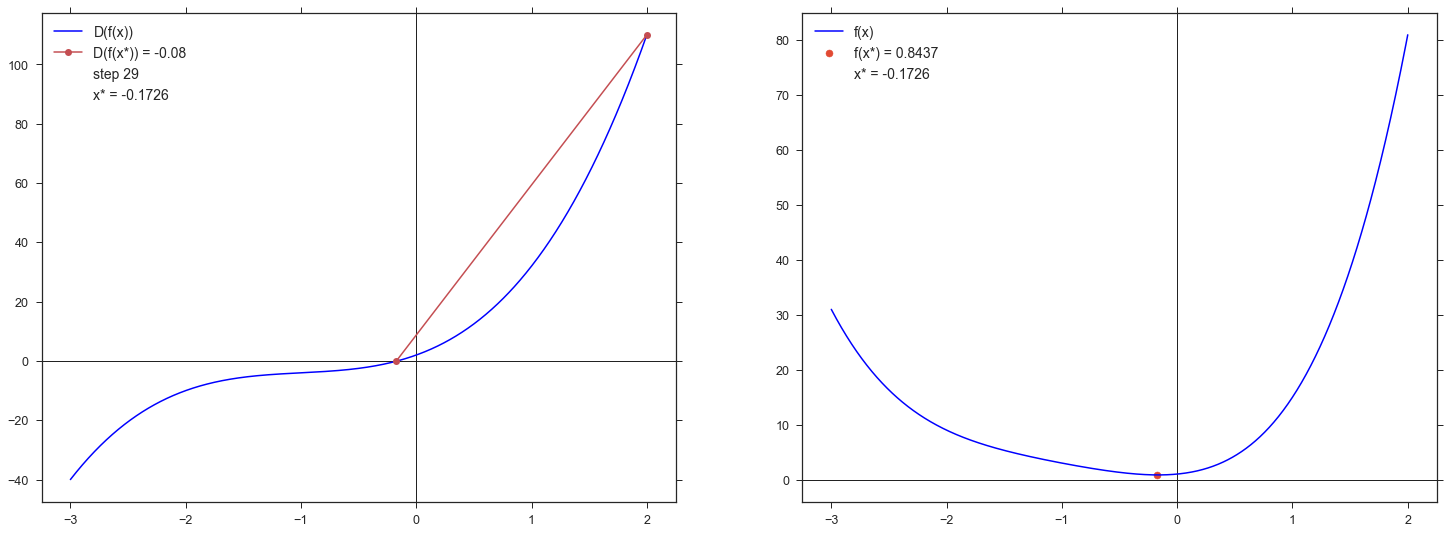

In [67]:
task.vis_steps(update = 0.1)

In [460]:
l = np.arange(1, 7, dtype=np.float32)
res1 = pd.DataFrame(columns = ['e', 'steps',"x", 'f(x*)'])
for e in l:
    model = Secant_search(f, -3, 2, 10**-e, prec = e.astype(int))
    model.fit()
    rep = [f'10e-{int(e)}', len(model.data), round(model.data['z'].iloc[-1], e.astype(int)), round(model.data['f(z)'].iloc[-1], e.astype(int))]
    res1.loc[len(res1)] = rep
res1

,e,steps,x,f(x*)
0,10e-1,29,-0.200000,0.800000
1,10e-2,39,-0.170000,0.840000
2,10e-3,49,-0.165000,0.843000
3,10e-4,59,-0.164900,0.843300
4,10e-5,69,-0.164880,0.843350
5,10e-6,79,-0.164878,0.843348


In [64]:
class Newton_search:
    def __init__(self, f, a, b, e, prec = 4):
        raw_f = inspect.getsource(f)
        self.func = raw_f[raw_f.find('return') + 6:].strip()
        self.a, self.b, self.e = a, b, e
        self.prec = prec
        
    def f(self, x):
        return f(x)
    
    def D(self, f, x):
        return D(x)
    
    def D2(self, f, x):
        return D2(x)
    
    def fit(self):
        a, b, e = self.a, self.b, self.e
        prec = self.prec
        
        cache = {}
        i = 0
        z = b
        while 1:
            z = z - (D(f, z)/D2(f, z))
            cache[i] = [z, f(z), D(f, z), D2(f, z)]
            if abs(D(f, z)) <= e:
                data = pd.DataFrame(cache).T
                data.columns = ['z', 'f(z)',"D(f(z))", "D2(f(z))"]
                self.data = data
                self.res = [round(z, prec), round(f(z), prec)]
                break
            else:
                if D(f, z) < 0:
                    a = z
                else:
                    b = z
            i+=1
            
    def rep(self):
        return print(f'Минимум функции f(x) = {self.func}, равный {round(self.res[1], self.prec)}  достигается при x = {round(self.res[0], self.prec)} с точностью e = {self.e} на шаге {len(self.data)}') 
    
    def vis_steps(self, update = 0.5):
        df, opt = self.data, self.res
        f, a, b = self.f, self.a, self.b
        prec = self.prec
        
        plt_x = np.linspace(a, b, round((b-a)*250))
        plt_data = np.array([plt_x, [f(x) for x in plt_x]])
        plt_data_der = np.array([plt_x, [D(f, x) for x in plt_x]])
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 9))   
        
        for i in range(5):
            display(fig)
            ax1.cla()
            clear_output(wait = True)
            plt.pause(0.5)
        
        for i in range(len(df)):
            
            ax2.set_ylim(min(plt_data[1]) - (max(plt_data[1]) - min(plt_data[1]))/10, max(plt_data[1]))
            ax1.set_ylim(min(plt_data_der[1]), max(plt_data_der[1]))
            
            ax1.axhline(y=0, color='k', linewidth=1)
            ax1.axvline(x=0, color='k', linewidth=1)
        
            ax2.axhline(y=0, color='k', linewidth=1)
            ax2.axvline(x=0, color='k', linewidth=1)
            
            ax1.plot(plt_data_der[0], plt_data_der[1], c = 'blue', label = "D(f(x))")
            ax2.plot(plt_data[0], plt_data[1], c = 'blue', label = 'f(x)')
            
            ax1.scatter(0, 0, c = 'white', label = f'step {i+1}')
            
            sz = np.array([a, b])
            sy = df["D(f(z))"][i] * (sz - df['z'][i]) + df['f(z)'][i]
            dsy = df["D2(f(z))"][i] * (sz - df['z'][i]) + df['D(f(z))'][i]
            
            if i != len(df)-1:
                ax1.scatter(0, 0, c = 'white', label = f'z = {round(df["z"][i], prec)}')
                ax2.scatter(0, 0, c = 'white', label = f'z = {round(df["z"][i], prec)}')
                
                ax1.scatter(df['z'][i], df['D(f(z))'][i], c = 'red', label = f'D(f(z)) = {round(df["D(f(z))"][i], prec)}')
                ax2.plot(sz, sy, c = 'red', label = f'D(f(z)) = {round(df["D(f(z))"][i], prec)}')
                ax1.plot(sz, dsy, c = 'red')
                ax2.scatter(df['z'][i], df['f(z)'][i], label = f'f(z) = {round(df["f(z)"][i], prec)}')
            else:
                ax1.scatter(0, 0, c = 'white', label = f'x* = {round(df["z"][i], prec)}')
                ax2.scatter(0, 0, c = 'white', label = f'x* = {round(df["z"][i], prec)}')
                
                ax1.scatter(df['z'][i], df['D(f(z))'][i], c = 'red', label = f'D(f(x*)) = {round(df["D(f(z))"][i], prec)}')
                ax2.plot(sz, sy, c = 'red', label = f'D(f(x*)) = {round(df["D(f(z))"][i], prec)}')
                ax1.plot(sz, dsy, c = 'red')
                ax2.scatter(df['z'][i], df['f(z)'][i], label = f'f(x*) = {round(df["f(z)"][i], prec)}')
                
            ax1.legend(prop={'size': 14})
            ax2.legend(prop={'size': 14})
            display(fig)
            
            ax1.cla()
            ax2.cla()

            clear_output(wait = True)
            plt.pause(update)
    

In [65]:
task1 = Newton_search(f, -3, 2, 0.0001, 5)
task1.fit()
task1.rep()

Минимум функции f(x) = x**4 + 4*(x**3) + 7*(x**2) + 2*x + 1, равный 0.84335  достигается при x = -0.16488 с точностью e = 0.0001 на шаге 6


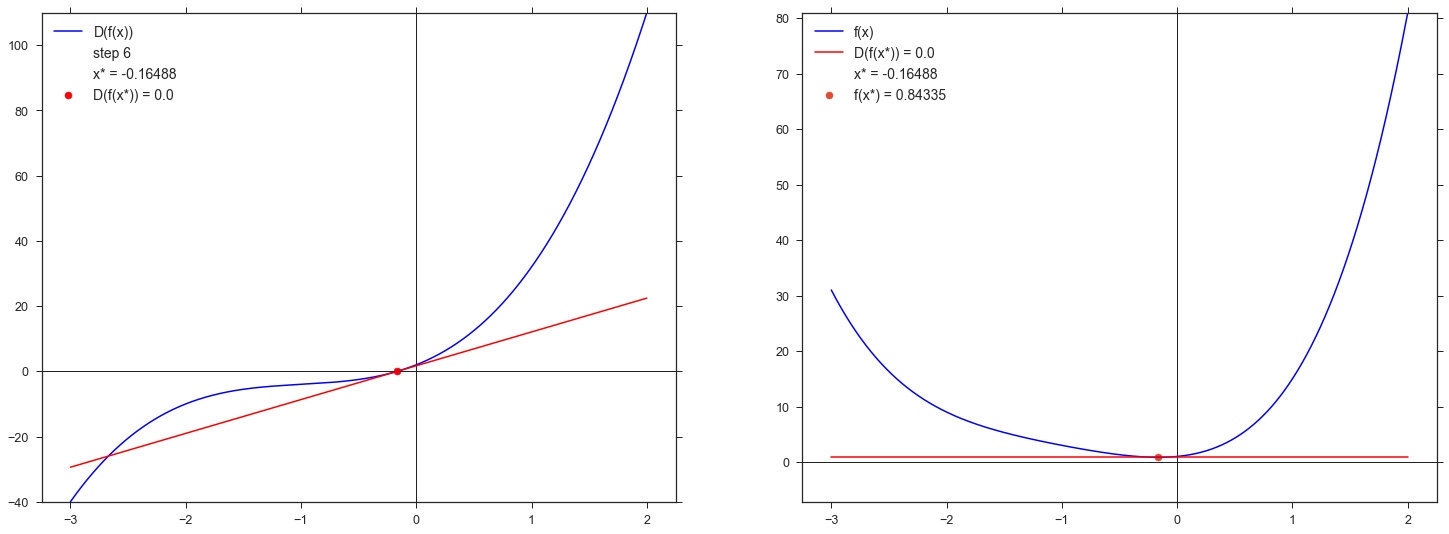

In [66]:
task1.vis_steps(1)

In [464]:
l = np.arange(1, 7, dtype=np.float32)
res2 = pd.DataFrame(columns = ['e', 'steps',"z", 'f(x*)'])
for e in l:
    model = Newton_search(f, -3, 2, 10**-e, prec = e.astype(int))
    model.fit()
    rep = [f'10e-{int(e)}', len(model.data), round(model.data['z'].iloc[-1], e.astype(int)), round(model.data['f(z)'].iloc[-1], e.astype(int))]
    res2.loc[len(res2)] = rep
res2

,e,steps,z,f(x*)
0,10e-1,5,-0.200000,0.800000
1,10e-2,5,-0.160000,0.840000
2,10e-3,6,-0.165000,0.843000
3,10e-4,6,-0.164900,0.843300
4,10e-5,6,-0.164880,0.843350
5,10e-6,7,-0.164878,0.843348
